Copyright (c) 2022, salesforce.com, inc and MILA.  
All rights reserved.  
SPDX-License-Identifier: BSD-3-Clause  
For full license text, see the LICENSE file in the repo root  
or https://opensource.org/licenses/BSD-3-Clause  

# Install prerequisite packages
Running this block takes about 4 minutes.

In [1]:
!git clone https://github.com/mila-iqia/climate-cooperation-competition.git

Cloning into 'climate-cooperation-competition'...
remote: Enumerating objects: 1496, done.
remote: Counting objects: 100% (292/292), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1496 (delta 161), reused 263 (delta 150), pack-reused 1204
Receiving objects: 100% (1496/1496), 76.93 MiB | 49.92 MiB/s, done.
Resolving deltas: 100% (770/770), done.


In [1]:
import os
os.chdir(os.getcwd()+"/climate-cooperation-competition")
_ROOT = os.getcwd()
!pip install -r requirements.txt
!pip install rl_warp_drive==1.6.7 # For troubleshooting, please refer to https://github.com/salesforce/warp-drive
!pip install ray[rllib]==1.0.0
!pip install codecarbon

Defaulting to user installation because normal site-packages is not writeable
  Using cached Flask-2.1.1-py3-none-any.whl (95 kB)
  Using cached gym-0.23.1.tar.gz (626 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pandas-1.3.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (10.6 MB)
  Using cached waitress-2.1.1-py3-none-any.whl (57 kB)
  Using cached jupyterlab-3.4.5-py3-none-any.whl (8.8 MB)
ERROR: Could not find a version that satisfies the requirement tensorflow==1.14 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.10.0rc0, 2.10.0rc1)
ERROR: No matching distribution found for tensorf

In [2]:
!pip3 install --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.0.0-py3-none-any.whl

Defaulting to user installation because normal site-packages is not writeable
  Using cached https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.0.0-py3-none-any.whl (39.3 MB)


# Load dependency

In [3]:
import os
import sys

import warnings
warnings.filterwarnings('ignore')
_ROOT = os.getcwd()
sys.path.append(_ROOT+"/scripts")
sys.path = [os.path.join(_ROOT, "/scripts")] + sys.path

from desired_outputs import desired_outputs
from importlib import reload
from codecarbon import EmissionsTracker

# Train agents with GPU

<!-- To train with GPU, you need to make sure that you have an **Nvdia Graphic Card** and be able to install critical packages such as ``warp-drive`` and ``pytorch``. If you don't have an Nvdia Graphic Card, you may refer to the section **Train Agents with CPU** below. -->

In this section, two examples of GPU-based training with [WarpDrive](https://github.com/salesforce/warp-drive) are presented. 


1.   The first example does not include negotiation between regions. Since there is no direct interaction between the different regions without negotiation, total runtime is ~2 minutes.
2.   The second example includes negotiations between regions. These negotiations take place according to the negotiation protocol outlined in ``rice.py``. Total runtime is 15~20 minutes.



In [4]:
import gpu_trainer

fixed_paths: Using PUBLIC_REPO_DIR = /home/jupyter/climate-cooperation-competition/climate-cooperation-competition
Using PUBLIC_REPO_DIR = /home/jupyter/climate-cooperation-competition/climate-cooperation-competition
Using _PRIVATE_REPO_DIR = /home/jupyter/climate-cooperation-competition/private-repo-clone


Here are some suggested baseline parameter values. The training process is done by a single GPU.

```python
num_envs = 100 # ensemble results with 100 randomly initialized enviornments
train_batch_size = 1024 # train with 1024 batch_size
num_episodes = 30000 # number of episodes
lr = 0.005 # learning rate
model_params_save_freq = 5000 # save model for every 5000 steps
```
Additionally, we specify 
```python 
negotiation_on = 0 # no negotiation
```


Running this next cell will take approximately 2 minutes.

In [7]:
gpu_trainer_off, gpu_nego_off_ts = gpu_trainer.trainer(negotiation_on=0, # no negotiation
  num_envs=100, 
  train_batch_size=1024, 
  num_episodes=3000, 
  lr=0.0005,
  model_params_save_freq=5000, 
  desired_outputs=desired_outputs, # a list of values that the simulator will output
  output_all_envs=False # output the mean of all "num_envs" results. Set to True for output all results
  )



Training with WarpDrive...
/home/jupyter/climate-cooperation-competition/climate-cooperation-competition/rice_step.cu(1435): warning: invalid narrowing conversion from "unsigned int" to "int"



Device: 0
Iterations Completed                    : 1 / 58
Speed performance stats
Mean policy eval time per iter (ms)     :   11272.56
Mean action sample time per iter (ms)   :      43.90
Mean env. step time per iter (ms)       :     109.94
Mean training time per iter (ms)        :     662.62
Mean total time per iter (ms)           :   12092.00
Mean steps per sec (policy eval)        :      90.84
Mean steps per sec (action sample)      :   23324.16
Mean steps per sec (env. step)          :    9314.03
Mean steps per sec (training time)      :    1545.38
Mean steps per sec (total)              :      84.68
Metrics for policy 'regions'
VF loss coefficient                     :    0.10000
Entropy coefficient                     :    0.50000
Total loss                              :   29.59216
Poli

To train the agents with negotiation, we modify ``negotiation_on``:

```python
negotiation_on = 1 # with naive negotiation
```
A naive negotiation protocol is already implemented, but **participants are expected to modify, improve and/or replace this protocol to maximize climate and economic outcomes**.

Running this next cell will take 15~20 minutes.

In [8]:


gpu_trainer_on, gpu_nego_on_ts = gpu_trainer.trainer(negotiation_on=1, # with naive negotiation
  num_envs=100,
  train_batch_size=1024,
  num_episodes=30000,
  lr=0.0005,
  model_params_save_freq=5000,
  desired_outputs=desired_outputs, # a list of values that the simulator will output
  output_all_envs=False # output the mean of all "num_envs" results. Set to True for output all results
  )



Training with WarpDrive...
/home/jupyter/climate-cooperation-competition/climate-cooperation-competition/rice_step.cu(1435): warning: invalid narrowing conversion from "unsigned int" to "int"



Device: 0
Iterations Completed                    : 1 / 1757
Speed performance stats
Mean policy eval time per iter (ms)     :     304.87
Mean action sample time per iter (ms)   :      85.40
Mean env. step time per iter (ms)       :       8.98
Mean training time per iter (ms)        :     279.93
Mean total time per iter (ms)           :     683.09
Mean steps per sec (policy eval)        :    3358.80
Mean steps per sec (action sample)      :   11990.12
Mean steps per sec (env. step)          :  113975.54
Mean steps per sec (training time)      :    3658.01
Mean steps per sec (total)              :    1499.07
Metrics for policy 'regions'
VF loss coefficient                     :    0.10000
Entropy coefficient                     :    0.50000
Total loss                              :  -81.68069
Po

The trainer `gpu_trainer_on` closes gracefully, so `gpu_nego_on_ts` contains the timeseries data from the trainer.


If you encounter the following error:

```
RuntimeError: CUDA out of memory.
```
reducing ``num_envs`` and ``train_batch_size`` can help to some extent.

If you encounter unexpected errors such as 

```
RuntimeError: CUDA error: invalid resource handle
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
```

please try to restart runtime before open an issue.

To customize the training script, please check ``gpu_trainer.py`` for more details.

# Train agents with CPU

CPU-based training can also be done with `rllib`, although it can take much longer depending on the complexity of the negotiation protocol (~3 times longer for the naive negotiation protocol).

In [9]:
# This is necessary for rllib to get the correct path!
os.chdir(_ROOT+"/scripts")
import cpu_trainer

DEBUG:ray:[ray] Forcing OMP_NUM_THREADS=1 to avoid performance degradation with many workers (issue #6998). You can override this by explicitly setting OMP_NUM_THREADS.
/home/jupyter/.local/lib/python3.8/site-packages/ray/tune/utils/util.py:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import defaultdict, deque, Mapping, Sequence
DEBUG:ray.tune.registry:Detected class for trainable.
DEBUG:ray.tune.registry:Detected class for trainable.
DEBUG:ray.tune.registry:Detected class for trainable.
DEBUG:ray.tune.registry:Detected class for trainable.
DEBUG:ray.tune.registry:Detected class for trainable.
DEBUG:ray.tune.registry:Detected class for trainable.
DEBUG:ray.tune.registry:Detected class for trainable.
DEBUG:ray.tune.registry:Detected class for trainable.
DEBUG:ray.tune.registry:Detected class for trainable.
DEBUG:ray.tune.registry:Detected class f

Here are some suggested baseline parameter values. The training process is done by a single CPU.

```python
num_envs = 1 # ensemble results with 100 random intialized enviornments
train_batch_size = 1024 # train with 1024 batch_size
num_episodes = 30000 # number of episodes
lr = 0.005 # learning rate
model_params_save_freq = 5000 # save model for every 5000 steps
num_workers=1 # a single CPU
```
Additionally, we specify 
```python 
negotiation_on = 0 # no negotiation
```


Running this next cell will take ~6 minutes.

In [10]:
cpu_trainer = reload(cpu_trainer)

In [11]:
cpu_trainer_off, cpu_nego_off_ts = cpu_trainer.trainer(negotiation_on=0,  # no negotiation
  num_envs=1, 
  train_batch_size=1024, 
  num_episodes=300, 
  lr=0.0005, 
  model_params_save_freq=5000, 
  desired_outputs=desired_outputs, # a list of values that the simulator will output
  num_workers=1)

Training with RLlib...


2022-08-18 19:04:43,090	INFO services.py:1164 -- View the Ray dashboard at http://127.0.0.1:8265
2022-08-18 19:04:43,096	WARNING services.py:1617 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 67104768 bytes available. This may slow down performance! You may be able to free up space by deleting files in /dev/shm or terminating any running plasma_store_server processes. If you are inside a Docker container, you may need to pass an argument with the flag '--shm-size' to 'docker run'.
2022-08-18 19:04:44,681	INFO trainer.py:616 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
2022-08-18 19:04:44,982	WARNING util.py:39 -- Install gputil for GPU system monitoring.


********** Iter :     1 /     5 **********


(pid=225) /home/jupyter/.local/lib/python3.8/site-packages/tensorflow/python/pywrap_tensorflow.py:15: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
(pid=225)   import imp
(pid=225) /home/jupyter/.local/lib/python3.8/site-packages/ray/tune/utils/util.py:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
(pid=225)   from collections import defaultdict, deque, Mapping, Sequence


(pid=225) fixed_paths: Using PUBLIC_REPO_DIR = /home/jupyter/climate-cooperation-competition/climate-cooperation-competition
(pid=225) Using PUBLIC_REPO_DIR = /home/jupyter/climate-cooperation-competition/climate-cooperation-competition
(pid=225) Using _PRIVATE_REPO_DIR = /home/jupyter/climate-cooperation-competition/private-repo-clone


(pid=225) /home/jupyter/.local/lib/python3.8/site-packages/ray/rllib/utils/torch_ops.py:65: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:175.)
(pid=225)   tensor = torch.from_numpy(np.asarray(item))
(pid=225) /home/jupyter/.local/lib/python3.8/site-packages/ray/rllib/utils/debug.py:36: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
(pid=225) Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes

episode_reward_mean: 103.32430618586923
********** Iter :     2 /     5 **********
episode_reward_mean: 103.54529253678336
********** Iter :     3 /     5 **********
episode_reward_mean: 103.39618706514744
********** Iter :     4 /     5 **********
episode_reward_mean: 103.88024791638617
********** Iter :     5 /     5 **********
episode_reward_mean: 104.50596726504344
fixed_paths: Using PUBLIC_REPO_DIR = /home/jupyter/climate-cooperation-competition/climate-cooperation-competition
Using PUBLIC_REPO_DIR = /home/jupyter/climate-cooperation-competition/climate-cooperation-competition
Using _PRIVATE_REPO_DIR = /home/jupyter/climate-cooperation-competition/private-repo-clone
NOTE: The submission file is created at: /home/jupyter/climate-cooperation-competition/climate-cooperation-competition/Submissions/1660849481.zip


To train the agents with negotiation, we modify ``negotiation_on``:

```python
negotiation_on = 1 # with naive negotiation
```
A naive negotiation protocol is already implemented, but **participants are expected to modify, improve and/or replace this protocol to maximize climate and economic outcomes**.

Running this next cell will take  ~33 minutes.

In [12]:
cpu_trainer = reload(cpu_trainer)

In [14]:
cpu_trainer_on, cpu_nego_on_ts = cpu_trainer.trainer(negotiation_on=1, # with naive negotiation
  num_envs=1, 
  train_batch_size=1024, 
  num_episodes=300, 
  lr=0.0005, 
  model_params_save_freq=5000, 
  desired_outputs=desired_outputs, # a list of values that the simulator will output
  num_workers=1)

2022-08-18 19:13:30,914	ERROR worker.py:643 -- Calling ray.init() again after it has already been called.


Training with RLlib...


(pid=5105) /home/jupyter/.local/lib/python3.8/site-packages/tensorflow/python/pywrap_tensorflow.py:15: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
(pid=5105)   import imp
2022-08-18 19:13:31,641	WARNING util.py:39 -- Install gputil for GPU system monitoring.


********** Iter :     1 /    17 **********


(pid=5105) /home/jupyter/.local/lib/python3.8/site-packages/ray/tune/utils/util.py:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
(pid=5105)   from collections import defaultdict, deque, Mapping, Sequence


(pid=5105) fixed_paths: Using PUBLIC_REPO_DIR = /home/jupyter/climate-cooperation-competition/climate-cooperation-competition
(pid=5105) Using PUBLIC_REPO_DIR = /home/jupyter/climate-cooperation-competition/climate-cooperation-competition
(pid=5105) Using _PRIVATE_REPO_DIR = /home/jupyter/climate-cooperation-competition/private-repo-clone


(pid=5105) /home/jupyter/.local/lib/python3.8/site-packages/ray/rllib/utils/torch_ops.py:65: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/pytorch/pytorch/torch/csrc/utils/tensor_numpy.cpp:175.)
(pid=5105)   tensor = torch.from_numpy(np.asarray(item))
(pid=5105) /home/jupyter/.local/lib/python3.8/site-packages/ray/rllib/utils/debug.py:36: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
(pid=5105) Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-n

episode_reward_mean: 100.9307103116663
********** Iter :     2 /    17 **********
episode_reward_mean: 101.09859605667148
********** Iter :     3 /    17 **********
episode_reward_mean: 101.49160094401819
********** Iter :     4 /    17 **********
episode_reward_mean: 101.5880376501375
********** Iter :     5 /    17 **********
episode_reward_mean: 101.94245792742696
********** Iter :     6 /    17 **********
episode_reward_mean: 102.17488029704806
********** Iter :     7 /    17 **********
episode_reward_mean: 102.99380047486626
********** Iter :     8 /    17 **********
episode_reward_mean: 104.04975336156019
********** Iter :     9 /    17 **********
episode_reward_mean: 105.00854019413477
********** Iter :    10 /    17 **********
episode_reward_mean: 105.99222298612462
********** Iter :    11 /    17 **********
episode_reward_mean: 106.97234012104263
********** Iter :    12 /    17 **********
episode_reward_mean: 107.90655738500111
********** Iter :    13 /    17 **********
episod

The trainer `cpu_trainer_on` closes gracefully, so `cpu_nego_on_ts` contains the timeseries data from the trainer.

If the process is killed during training, reducing ``num_envs`` and ``train_batch_size`` can help to some extent.

# Save or load from previous training results

This section is for saving and loading the results of training (not the trainer itself).

In [15]:
from opt_helper import save, load

To save the output timeseries: 

In [16]:
# [uncomment below to save]
save({"nego_off":gpu_nego_off_ts, "nego_on":gpu_nego_on_ts}, "filename.pkl")

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


To load the output timeseries:

In [17]:
# [uncomment below to load]
dict_ts = load("filename.pkl")
nego_off_ts, nego_on_ts = dict_ts["nego_off"], dict_ts["nego_on"]

The available data that we can plot

# Plot results

In [18]:
from desired_outputs import desired_outputs

One may want to check the performance of the agents by plotting graphs. Below, we list all the logged variables. One may change the ``desired_outputs.py`` to add more variables of interest.

```python
desired_outputs = ['global_temperature', 
  'global_carbon_mass', 
  'capital_all_regions', 
  'labor_all_regions', 
  'production_factor_all_regions', 
  'intensity_all_regions', 
  'global_exogenous_emissions', 
  'global_land_emissions', 
  'timestep', 
  'activity_timestep', 
  'capital_depreciation_all_regions', 
  'savings_all_regions', 
  'mitigation_rate_all_regions', 
  'max_export_limit_all_regions', 
  'mitigation_cost_all_regions', 
  'damages_all_regions', 
  'abatement_cost_all_regions', 
  'utility_all_regions', 
  'social_welfare_all_regions', 
  'reward_all_regions', 
  'consumption_all_regions', 
  'current_balance_all_regions', 
  'gross_output_all_regions', 
  'investment_all_regions', 
  'production_all_regions', 
  'tariffs', 
  'future_tariffs', 
  'scaled_imports', 
  'desired_imports', 
  'tariffed_imports', 
  'stage', 
  'minimum_mitigation_rate_all_regions', 
  'promised_mitigation_rate', 
  'requested_mitigation_rate', 
  'proposal_decisions',
  'global_consumption',
  'global_production']
```

In [19]:
from opt_helper import plot_result

`plot_result()` plots the time series of logged variables.

```python
plot_result(variables, nego_off, nego_on, k)
```
* ``variables`` can be either a single variable of interest or a list of variable names from the above list. 
* The ``nego_off_ts`` and ``nego_on_ts`` are the logged time series for these variables, with and without negotiation. 
* ``k`` represents the dimension of the variable of interest ( it should be ``0`` by default for most situations).

Here's an example of plotting a single variable of interest.

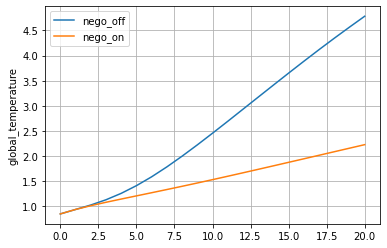

In [20]:
plot_result("global_temperature", 
  nego_off=gpu_nego_off_ts, # change it to cpu_nego_off_ts if using CPU
  nego_on=gpu_nego_on_ts, 
  k=0)

Here's an example of plotting a list of variables.

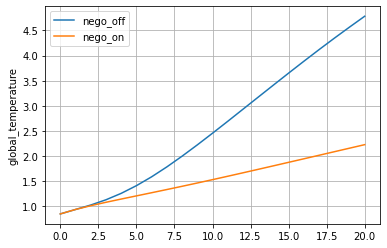

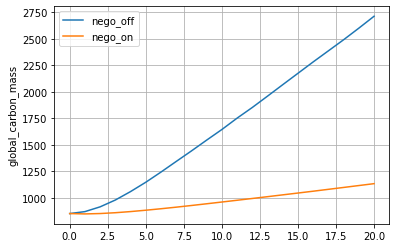

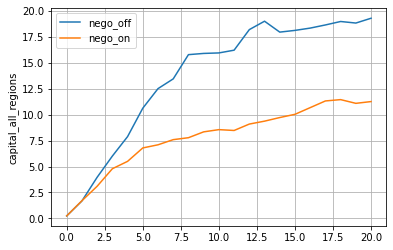

In [21]:
plot_result(desired_outputs[0:3], # truncated for demonstration purposes
  nego_off=gpu_nego_off_ts, 
  nego_on=gpu_nego_on_ts, 
  k=0)

If one only want to plot negotiation-off plots, feel free to set `nego_on=None`. 

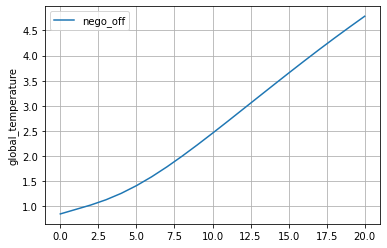

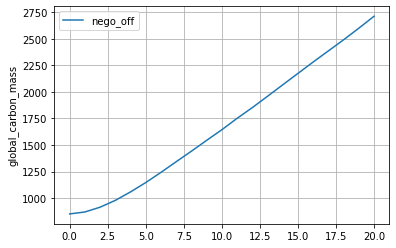

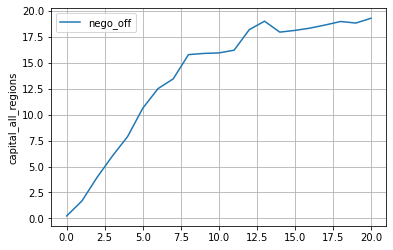

In [22]:
plot_result(desired_outputs[0:3], # truncated for demonstration purposes
  nego_off=gpu_nego_off_ts, 
  nego_on=None, 
  k=0)

# How to quickly evaluate the results

This section to for evaluating the trained agents. One can edit the evaluation function ``eval metrics`` in ``evaluate_submission.py`` to include more metrics of interest.

The evaluation script requires as input:
1. The trainer
2. The logged_variables
3. The framework of the trainer. If using GPU-based training, it should be ``warpdrive``. If using CPU-based training, it should be ``rllib``.

We give one example below.

In [23]:
os.chdir(os.path.join(_ROOT,"scripts"))
from evaluate_submission import val_metrics
val_metrics(trainer=gpu_trainer_off, logged_ts=gpu_nego_off_ts, framework="warpdrive")

(True,
 'Successful submission',
 {'Episode Reward': 117.8,
  'Temperature Rise': 3.93,
  'Carbon Mass': 2712,
  'Capital': 29703,
  'Production': 6790,
  'Gross Output': 6492,
  'Investment': 2647,
  'Abatement Cost': 15.51})

# Code pieces that can be modified

As a running example, we use the bilateral negotiation protocol. For more examples, please see section 5.3 in [the white paper](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/White_Paper.pdf).

## Introduction of environment codes

[``rice.py``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py), [``rice_cuda.py``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice_cuda.py), [``rice_step.cu``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice_step.cu) and [``rice_helpers.py``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice_helpers.py) are responsible for the GPU code.

* [``rice.py``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py) includes interactions between the agents and the environment. **[``rice.py``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py) is the main script to be modified.**

* [``rice_helpers.py``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice_helpers.py) includes all the socioeconomic and climate dynamics. [``rice_helpers.py``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice_helpers.py) should not be changed.

* [GPU needed] [``rice_cuda.py``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice_cuda.py) connects the data between the python script and CUDA code.

* [GPU needed] [``rice_step.cu``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice_step.cu) is the CUDA version of the code which contains the socioeconomic and climate dynamics, as well as the interactions between the agents and the environment. **To use GPU-based training, the CUDA code in ``rice_step.cu`` must have the same logic as the python code in [``rice.py``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py) and [``rice_helpers.py``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice_helpers.py).** The CUDA code mostly follows the grammar of C++. Please refer to [here](https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html) for more details.



## How to add extra observations

To add extra observations or make changes to the observation space, at least two functions must be modified.
1.   [`generate_observation()`](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py#L379)
2.   [`reset()`](https://github.com/mila-iqia/climate-cooperation-competition/blob/)

As an example, [here](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py#L428) are the features added when the naive bilateral negotiation protocol is enabled in the simulator: 

``` python
        if self.negotiation_on:
            global_features += ["stage"]

            public_features += []

            private_features += [
                "minimum_mitigation_rate_all_regions",
            ]

            bilateral_features += [
                "promised_mitigation_rate",
                "requested_mitigation_rate",
                "proposal_decisions",
            ]

        shared_features = np.array([])
        for feature in global_features + public_features:
            shared_features = np.append(
                shared_features,
                self.flatten_array(
                    self.global_state[feature]["value"][self.timestep]
                    / self.global_state[feature]["norm"]
                ),
            )


```


## How to add actions

By default, agents' actions are contained in [`self.actions_nvec`](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py#L136) during [`init()`](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py#L64):

```python
        self.actions_nvec = (
            self.savings_action_nvec
            + self.mitigation_rate_action_nvec
            + self.export_action_nvec
            + self.import_actions_nvec
            + self.tariff_actions_nvec
        )

```

Extra actions related to the negotiation protocol can be appended to `self.actions_nvec`.
It is important that extra actions be appended at the **end** of `self.actions_nvec`.
``` python 
            # Each region proposes to each other region
            # self mitigation and their mitigation values
            self.proposal_actions_nvec = (
                [self.num_discrete_action_levels] * 2 * self.num_regions
            )

            # Each region evaluates a proposal from every other region,
            # either accept or reject.
            self.evaluation_actions_nvec = [2] * self.num_regions

            # extra actions are appended to the end of self.actions_nvec
            self.actions_nvec += (
                self.proposal_actions_nvec + self.evaluation_actions_nvec
            )

```

## How to implement the logic for negotiation protocols

The baseline logic for bilateral negotiation actions is a naive bargain process with two steps:
1. A [``proposal_step()``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py#L536) for each agent to propose certains actions to other agents, for example a minimum mitigation rate.
2. An [``evaluation_step()``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py#L585) for each agent to evaluation other agents' proposals. 

These functions describe how the negotiations actions affect the observation space and the action masking (for more, see the next section).
Both steps are done sequentially in the [``step()``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py#L346) function in [``rice.py``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py): 

```python
        if self.negotiation_on:
            # Note: The '+1` below is for the climate_and_economy_simulation_step
            self.stage = self.timestep % (self.num_negotiation_stages + 1)
            self.set_global_state(
                "stage", self.stage, self.timestep, dtype=self.int_dtype
            )
            if self.stage == 1:
                return self.proposal_step(actions)

            if self.stage == 2:
                return self.evaluation_step(actions)

        return self.climate_and_economy_simulation_step(actions)

```
Once the stages of the negotiation protocol are concluded, then the [`climate_and_economy_simulation_step()`](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py#L651) implements the socioeconomic and climate dynamics associated with the updated observation space and masked actions.

We expect competitors to propose different mechanisms to encourage global cooperation along climate and economic objectives.
Participants should therefore modify this code to match the logic of their proposed negotiation protocol, even proposing new functions to replace [``proposal_step()``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py#L536), [``evaluation_step()``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py#L585) and the code above.

For example, competitors could propose a mechanism to form [dynamic climate clubs](https://williamnordhaus.com/publications/climate-clubs-overcoming-free-riding-international-climate-policy), where admittance is based on a minimum mitigation rate. Club members enjoy lower tariffs when trading with other club members, while non-members, who do not have to contribute to mitigation, suffer heavy tariffs when trading with club members.



## What is masking?

Action masking determines the feasible subspace of the action space according to the negotiation protocol. Action masks are set before agents choose their actions, so the agent explicitly chooses from the feasible action subspace.
To implement this logic, actions masks are modified in the [``evaluation_step()``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py#L585), after the [``proposal_step()``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py#L536) and [``evaluation_step()``](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py#L585), but before the [`climate_and_economy_simulation_step()`](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py#L651). This way, the regions are prohibited from taking actions outside of the feasible action subspace.

For example, during the bilateral negotiation process, regions that agree to implement minimum mitigation rates are required to do so. 

```python
        for region_id in range(self.num_regions):
            outgoing_accepted_mitigation_rates = [
                self.global_state["promised_mitigation_rate"]["value"][
                    self.timestep, region_id, j
                ]
                * self.global_state["proposal_decisions"]["value"][
                    self.timestep, j, region_id
                ]
                for j in range(self.num_regions)
            ]
            incoming_accepted_mitigation_rates = [
                self.global_state["requested_mitigation_rate"]["value"][
                    self.timestep, j, region_id
                ]
                * self.global_state["proposal_decisions"]["value"][
                    self.timestep, region_id, j
                ]
                for j in range(self.num_regions)
            ]

            self.global_state["minimum_mitigation_rate_all_regions"]["value"][
                self.timestep, region_id
            ] = max(
                outgoing_accepted_mitigation_rates + incoming_accepted_mitigation_rates
            )

```



## How to implement and/or modify the logic of action masking?

The logic behind action masks is implemented in [`generate_action_mask()`](https://github.com/mila-iqia/climate-cooperation-competition/blob/main/rice.py#L506).
`mask_dict` gives the mapping for each region to its corresponding action `mask`. In the current implementation, `mask` is a binary vector where `0` indicates an action that is not allowed, and `1` indicates an action that is allowed.

For example, in the bilateral negotiation protocol, the action mask is based on the minimum mitigation rate for each region (see code below).
```python
    def generate_action_mask(self):
        """
        Generate action masks.
        """
        mask_dict = {region_id: None for region_id in range(self.num_regions)}
        for region_id in range(self.num_regions):
            mask = self.default_agent_action_mask.copy()
            if self.negotiation_on:
                minimum_mitigation_rate = int(round(
                    self.global_state["minimum_mitigation_rate_all_regions"]["value"][
                        self.timestep, region_id
                    ]
                    * self.num_discrete_action_levels
                ))
                mitigation_mask = np.array(
                    [0 for _ in range(minimum_mitigation_rate)]
                    + [
                        1
                        for _ in range(
                            self.num_discrete_action_levels - minimum_mitigation_rate
                        )
                    ]
                )
                mask_start = sum(self.savings_action_nvec)
                mask_end = mask_start + sum(self.mitigation_rate_action_nvec)
                mask[mask_start:mask_end] = mitigation_mask
            mask_dict[region_id] = mask

        return mask_dict

```